### Gale-Shapley Algorithm Implementation
**FIZ371 - Scientific & Technical Computations | 26/04/2021**

  
Dr. Emre S. Tasci <emre.tasci@hacettepe.edu.tr>


In [1]:
import numpy as np
import copy

In [2]:
def names2ids2names(names_men,names_women):
    name2id = {}
    id2man = {}
    id2woman = {}
    for i,name in enumerate(names_men):
        name2id[name] = i
        id2man[i] = name
    for i,name in enumerate(names_women):
        name2id[name] = i
        id2woman[i] = name
    return name2id,id2man,id2woman

In [3]:
def visualizer(prop,pref_top,pref_bottom,name2id):
    # "Visualizer"
    vis_top = []
    vis_mid = []
    vis_bottom = []
    vis_pref = []
    for i,match in enumerate(prop):
        top,bottom = match
        vis_top.append("{:^9}".format(top))
        vis_mid.append("{:^9}".format("|"))
        vis_bottom.append("{:^9}".format(bottom))
        vis_pref.append("{:^9}".format("{:}x{:}".format(pref_top[name2id[top],name2id[bottom]],
                          pref_bottom[name2id[bottom]][name2id[top]])))
    visualize = "{:}".format("".join(vis_top)+"\n"+"".join(vis_mid)+\
                             "\n"+"".join(vis_bottom)+"\n"+\
                             "".join(vis_pref))
    return visualize

In [4]:
def find_stable(pref,names,proposed_by="m",men=1,verbose=True,top="x"):
    output = []
    
    if(men==1):
        pref_women = pref[0]
        pref_men = pref[1]
        names_women = names[0]
        names_men = names[1]
    else:
        pref_women = pref[1]
        pref_men = pref[0]
        names_women = names[1]
        names_men = names[0]

    name2id,id2man,id2woman = names2ids2names(names_men,names_women)
    
    if(proposed_by == "m"):
        pref_wooer = pref_men
        pref_wooed = pref_women
        names_wooer = names_men
        names_wooed = names_women
        id2wooer = id2man
        id2wooed = id2woman
    else:
        pref_wooed = pref_men
        pref_wooer = pref_women
        names_wooed = names_men
        names_wooer = names_women
        id2wooer = id2woman
        id2wooed = id2man
    
    num_people = len(id2man)
    
    wooer_curr_counter = np.zeros(num_people,int)
    
    pref2ids = []
    for wooer_id in range(num_people):
        aux_arr = np.zeros(num_people,int)
        for i,pref in enumerate(pref_wooer[wooer_id]):
            aux_arr[pref-1] = i
        pref2ids.append(aux_arr)
    #print(pref2ids)

    zero_to_num = np.arange(num_people)
    flag_continue = True
    while(flag_continue):
        # Assign wooed's bins
        bin_wooed = []
        for i in range(num_people):
            bin_wooed.append([])
        flag_continue = False
        for wooer_id in zero_to_num:
            wooer_name = id2wooer[wooer_id]
            wooer_pref_arr = pref2ids[wooer_id]
            wooer_curr_pref_wooed_id = pref2ids[wooer_id][wooer_curr_counter[wooer_id]]
            wooer_curr_pref_wooed_name = id2wooed[wooer_curr_pref_wooed_id]
            output.append("{:3}({:})'s {:}. preference: {:4}({:})"\
                  .format(id2wooer[wooer_id],wooer_id,wooer_curr_counter[wooer_id]+1,
                          wooer_curr_pref_wooed_name,wooer_curr_pref_wooed_id))
            bin_wooed[wooer_curr_pref_wooed_id].append(wooer_id)
        output.append(str(bin_wooed))
        for wooed_id in zero_to_num:
            candidates = np.array(bin_wooed[wooed_id])
            if(len(candidates)>1):
                flag_continue = True
                #print(candidates)
                pref_candidates = pref_wooed[wooed_id][candidates]
                #print(pref_candidates)
                w = pref_candidates.argmin()
                #print(w)
                rejected = candidates[pref_candidates != pref_candidates[w]]
                #print(rejected)
                for i in rejected:
                    wooer_curr_counter[i] +=1
                    bin_wooed[wooed_id].remove(i)
            #print(men_curr_counter)
        output.append("\n"+"-"*45+"\n")
    output.append(str(bin_wooed))
    
    aux_dic = {}
    for i,wooed_id in enumerate(bin_wooed):
        aux_dic[id2wooer[i]] = id2wooed[wooed_id[0]]
        aux_dic[id2wooed[wooed_id[0]]] = id2wooer[i]

    m_names = []
    w_names = []
    
    if(proposed_by == "m"):
        # wooer : m, wooed : w
        for i,wooed_id in enumerate(bin_wooed):
            m_names.append(id2wooer[i])
            w_names.append(id2wooed[wooed_id[0]])
    elif(proposed_by == "w"):
        # wooer : w, wooed : m
        for i,wooed_id in enumerate(bin_wooed):
            w_names.append(id2wooer[i])
            m_names.append(id2wooed[wooed_id[0]])   

    # Decide which species to be put on top
    if(top == "x"):
        # No preference, so put the wooed
        if(proposed_by == "m"):
            names_top = w_names
            names_bottom = m_names
            pref_top = pref_women
            pref_bottom = pref_men
            return_names_top = names_women
            return_names_bottom = names_men
        else:
            names_top = m_names
            names_bottom = w_names
            pref_top = pref_men
            pref_bottom = pref_women
            return_names_top = names_men
            return_names_bottom = names_women            
    elif(top == "m"):
        names_top = m_names
        names_bottom = w_names
        pref_top = pref_men
        pref_bottom = pref_women
        return_names_top = names_men
        return_names_bottom = names_women        
    else:
        names_top = w_names
        names_bottom = m_names
        pref_top = pref_women
        pref_bottom = pref_men
        return_names_top = names_women
        return_names_bottom = names_men
        
    
    ret_prop =[]
    for topn,botn in zip(names_top,names_bottom):
        ret_prop.append([topn,botn])
            
    output.append(str(ret_prop))

    vis = visualizer(ret_prop,pref_top,pref_bottom,name2id)
    print(vis)
    if(verbose):
        print("\n*Details:*\n\n"+"\n".join(output))
    
    # We are also returning additional properties so 
    # if needed can be fed into check_stability
    return (ret_prop,[pref_top,pref_bottom],\
            [return_names_top,return_names_bottom])

In [5]:
def check_stability(res,verbose=True):
    
    output = []
    unstables = []
    
    prop = res[0]
    #print(prop)
    pref_top = res[1][0]
    pref_bottom = res[1][1]
    names_top = res[2][0]
    names_bottom = res[2][1]        
    
    num_people = len(pref_top)
    zero_to_num = np.arange(num_people)
    
    name2id = {}
    id2top = []
    id2bottom = []
    for i, (name_t,name_b) in enumerate(zip(names_top,names_bottom)):
        #print(i,name_t,name_b)
        name2id[name_t] = i
        name2id[name_b] = i
        id2top.append(name_t)
        id2bottom.append(name_b)
    
    vis = visualizer(prop,pref_top,pref_bottom,name2id)
    print(vis)
    print("")
    
    # Convert the given proposition to ids and prefs
    ids = []
    pref = []
    dic_match = {}
    for row in prop:
        n_t,n_b = row
        dic_match[n_t] = n_b
        dic_match[n_b] = n_t
        id_t = name2id[n_t]
        id_b = name2id[n_b]
        ids.append([name2id[n_t],name2id[n_b]])
        pref.append([pref_top[id_t][id_b],pref_bottom[id_b][id_t]])
    #print(ids)
    #print(pref)
    
    out_top = []
    out_bot = []
    
    for i,(ids_tb,pref_tb) in enumerate(zip(ids,pref)):
        id_t, id_b = ids_tb
        pref_t,pref_b = pref_tb
        out_top.append("* {:} is currently matched with {:} - their {:}. choice".\
             format(names_top[id_t],names_bottom[id_b],pref_t))
        out_bot.append("* {:} is currently matched with {:} - their {:}. choice".\
             format(names_bottom[id_b],names_top[id_t],pref_b))        
        if(pref_t == 1):
            out_top.append("  {:} can't do any better because they already got their top choice!".format(names_top[id_t]))
        else:
            out_top.append("  Let's see if they can persuade a higher preferred candidate.")
            prefs_this_t = np.array(pref_top[id_t])
            for p in range(1,pref_t):
                nth_b_id = zero_to_num[prefs_this_t == p][0]
                nth_b_name = names_bottom[nth_b_id]
                out_top.append("   - Their {:}. choice is {:}:".\
                      format(p,nth_b_name))
                nth_b_match_t_name = dic_match[nth_b_name]
                nth_b_match_t_id = name2id[nth_b_match_t_name]
                nth_b_match_t_pref = pref_bottom[nth_b_id][nth_b_match_t_id]
                out_top.append("      {:} is currently matched with {:}, their {:}. choice.".\
                      format(nth_b_name,nth_b_match_t_name,nth_b_match_t_pref))
                nth_b_this_t_pref = pref_bottom[nth_b_id][id_t]
                str_aux = "      Since {:} is {:}'s {:}. choice and ".\
                      format(names_top[id_t],nth_b_name,nth_b_this_t_pref)
                if(nth_b_this_t_pref<nth_b_match_t_pref):
                    str_aux += "{:}<{:}\n         --> {:} will reject their current match - Unstable!".\
                         format(nth_b_this_t_pref,nth_b_match_t_pref,nth_b_name)
                    unstables.append("{:}: x {:} -> {:}".format(names_top[id_t],names_bottom[id_b],nth_b_name))
                else:
                    str_aux += "{:}>{:}\n         --> {:} is satisfied with their current match.".\
                         format(nth_b_this_t_pref,nth_b_match_t_pref,nth_b_name)
                out_top.append(str_aux)
                out_top.append("")
        out_top.append("-"*45+"\n")

        
        if(pref_b == 1):
            out_bot.append("  {:} can't do any better because they already got their top choice!".format(names_bottom[id_b]))
        else:
            out_bot.append("  Let's see if they can persuade a higher preferred candidate.")
            prefs_this_b = np.array(pref_bottom[id_b])
            for p in range(1,pref_b):
                nth_t_id = zero_to_num[prefs_this_b == p][0]
                nth_t_name = names_top[nth_t_id]
                out_bot.append("   - Their {:}. choice is {:}:".\
                      format(p,nth_t_name))
                nth_t_match_b_name = dic_match[nth_t_name]
                nth_t_match_b_id = name2id[nth_t_match_b_name]
                nth_t_match_b_pref = pref_top[nth_t_id][nth_t_match_b_id]
                out_bot.append("      {:} is currently matched with {:}, their {:}. choice.".\
                      format(nth_t_name,nth_t_match_b_name,nth_t_match_b_pref))
                nth_t_this_b_pref = pref_top[nth_t_id][id_b]
                str_aux = "      Since {:} is {:}'s {:}. choice and ".\
                      format(names_bottom[id_b],nth_t_name,nth_t_this_b_pref)
                if(nth_t_this_b_pref<nth_t_match_b_pref):
                    str_aux += "{:}<{:}\n         --> {:} will reject their current match - Unstable!".\
                         format(nth_t_this_b_pref,nth_t_match_b_pref,nth_t_name)
                    unstables.append("{:}: x {:} -> {:}".format(names_bottom[id_b],names_top[id_t],nth_t_name))
                else:
                    str_aux += "{:}>{:}\n         --> {:} is satisfied with their current match.".\
                         format(nth_t_this_b_pref,nth_t_match_b_pref,nth_t_name)
                out_bot.append(str_aux)
                out_bot.append("")
        out_bot.append("-"*45+"\n")
    
    if(verbose):
        print("\n".join(out_top))
        print("\n".join(out_bot))
    
    if(len(unstables)):
        print("\nThis proposal is unstable due to:\n * ",end="")
        print("\n * ".join(unstables))
    else:
        print("\nThis proposal is stable.")

# Case 1
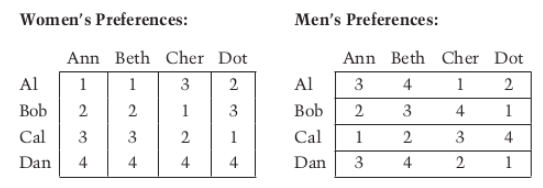

In [6]:
pref_0 = np.array([[1,1,3,2],[2,2,1,3],[3,3,2,1],[4,4,4,4]]).T
pref_1 = np.array([[3,4,1,2],[2,3,4,1],[1,2,3,4],[3,4,2,1]])

pref = [pref_0, pref_1]

names_0 = np.array(["Ann","Beth","Cher","Dot"])
names_1 = np.array(["Al","Bob","Cal","Dan"])

names = [names_0, names_1]

## 1.1 Find a stable proposition:
### Women proposed by men:

In [7]:
prop_1_1_pw = find_stable(pref,names,proposed_by="m",
                          verbose=True,top="w")

  Cher      Dot      Ann     Beth   
    |        |        |        |    
   Al       Bob      Cal      Dan   
   3x1      3x1      3x1      4x4   

*Details:*

Al (0)'s 1. preference: Cher(2)
Bob(1)'s 1. preference: Dot (3)
Cal(2)'s 1. preference: Ann (0)
Dan(3)'s 1. preference: Dot (3)
[[2], [], [0], [1, 3]]

---------------------------------------------

Al (0)'s 1. preference: Cher(2)
Bob(1)'s 1. preference: Dot (3)
Cal(2)'s 1. preference: Ann (0)
Dan(3)'s 2. preference: Cher(2)
[[2], [], [0, 3], [1]]

---------------------------------------------

Al (0)'s 1. preference: Cher(2)
Bob(1)'s 1. preference: Dot (3)
Cal(2)'s 1. preference: Ann (0)
Dan(3)'s 3. preference: Ann (0)
[[2, 3], [], [0], [1]]

---------------------------------------------

Al (0)'s 1. preference: Cher(2)
Bob(1)'s 1. preference: Dot (3)
Cal(2)'s 1. preference: Ann (0)
Dan(3)'s 4. preference: Beth(1)
[[2], [3], [0], [1]]

---------------------------------------------

[[2], [3], [0], [1]]
[['Cher', 'Al'], ['Dot',

**Check the stability**

In [8]:
check_stability(prop_1_1_pw)

  Cher      Dot      Ann     Beth   
    |        |        |        |    
   Al       Bob      Cal      Dan   
   3x1      3x1      3x1      4x4   

* Cher is currently matched with Al - their 3. choice
  Let's see if they can persuade a higher preferred candidate.
   - Their 1. choice is Bob:
      Bob is currently matched with Dot, their 1. choice.
      Since Cher is Bob's 4. choice and 4>1
         --> Bob is satisfied with their current match.

   - Their 2. choice is Cal:
      Cal is currently matched with Ann, their 1. choice.
      Since Cher is Cal's 3. choice and 3>1
         --> Cal is satisfied with their current match.

---------------------------------------------

* Dot is currently matched with Bob - their 3. choice
  Let's see if they can persuade a higher preferred candidate.
   - Their 1. choice is Cal:
      Cal is currently matched with Ann, their 1. choice.
      Since Dot is Cal's 4. choice and 4>1
         --> Cal is satisfied with their current match.

   - Th

### Men proposed by women:

In [9]:
prop_1_1_pw = find_stable(pref,names,proposed_by="w",
                          verbose=True)

   Cal      Dan      Al       Bob   
    |        |        |        |    
   Ann     Beth     Cher      Dot   
   1x3      4x4      1x3      1x3   

*Details:*

Ann(0)'s 1. preference: Al  (0)
Beth(1)'s 1. preference: Al  (0)
Cher(2)'s 1. preference: Bob (1)
Dot(3)'s 1. preference: Cal (2)
[[0, 1], [2], [3], []]

---------------------------------------------

Ann(0)'s 1. preference: Al  (0)
Beth(1)'s 2. preference: Bob (1)
Cher(2)'s 1. preference: Bob (1)
Dot(3)'s 1. preference: Cal (2)
[[0], [1, 2], [3], []]

---------------------------------------------

Ann(0)'s 1. preference: Al  (0)
Beth(1)'s 2. preference: Bob (1)
Cher(2)'s 2. preference: Cal (2)
Dot(3)'s 1. preference: Cal (2)
[[0], [1], [2, 3], []]

---------------------------------------------

Ann(0)'s 1. preference: Al  (0)
Beth(1)'s 2. preference: Bob (1)
Cher(2)'s 2. preference: Cal (2)
Dot(3)'s 2. preference: Al  (0)
[[0, 3], [1], [2], []]

---------------------------------------------

Ann(0)'s 2. preference: Bob (1)
Bet

So we see that both sides' proposals yield the same matching. Hence this is a unique match.

For breve output & easier comparison:

In [10]:
prop_1_1_pw = find_stable(pref,names,proposed_by="w",
                          verbose=False,top="w")

   Ann     Beth     Cher      Dot   
    |        |        |        |    
   Cal      Dan      Al       Bob   
   3x1      4x4      3x1      3x1   


In [11]:
prop_1_1_pm = find_stable(pref,names,proposed_by="m",
                          verbose=False)

  Cher      Dot      Ann     Beth   
    |        |        |        |    
   Al       Bob      Cal      Dan   
   3x1      3x1      3x1      4x4   


## 1.2 Evaluate different matches (straight from the book)

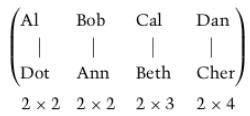

In [12]:
prop_gura_1 = [["Al","Dot"],["Bob","Ann"],["Cal","Beth"],["Dan","Cher"]]
prop_gura_1_input=(prop_gura_1,[pref_1,pref_0],[names_1,names_0])
check_stability(prop_gura_1_input,verbose=True)

   Al       Bob      Cal      Dan   
    |        |        |        |    
   Dot      Ann     Beth     Cher   
   2x2      2x2      2x3      2x4   

* Al is currently matched with Dot - their 2. choice
  Let's see if they can persuade a higher preferred candidate.
   - Their 1. choice is Cher:
      Cher is currently matched with Dan, their 4. choice.
      Since Al is Cher's 3. choice and 3<4
         --> Cher will reject their current match - Unstable!

---------------------------------------------

* Bob is currently matched with Ann - their 2. choice
  Let's see if they can persuade a higher preferred candidate.
   - Their 1. choice is Dot:
      Dot is currently matched with Al, their 2. choice.
      Since Bob is Dot's 3. choice and 3>2
         --> Dot is satisfied with their current match.

---------------------------------------------

* Cal is currently matched with Beth - their 2. choice
  Let's see if they can persuade a higher preferred candidate.
   - Their 1. choice is A

## Men's first choices

In [13]:
prop_gura_2 = [["Al","Cher"],["Bob","Dot"],["Cal","Ann"],["Dan","Beth"]]
prop_gura_2_input=(prop_gura_2,[pref_1,pref_0],[names_1,names_0])
check_stability(prop_gura_2_input,verbose=False)

   Al       Bob      Cal      Dan   
    |        |        |        |    
  Cher      Dot      Ann     Beth   
   1x3      1x3      1x3      4x4   


This proposal is stable.


This is also the same one we derived via men/women proposing. It was unique, so this is the only stable proposal.

# Case 2 (from the book)
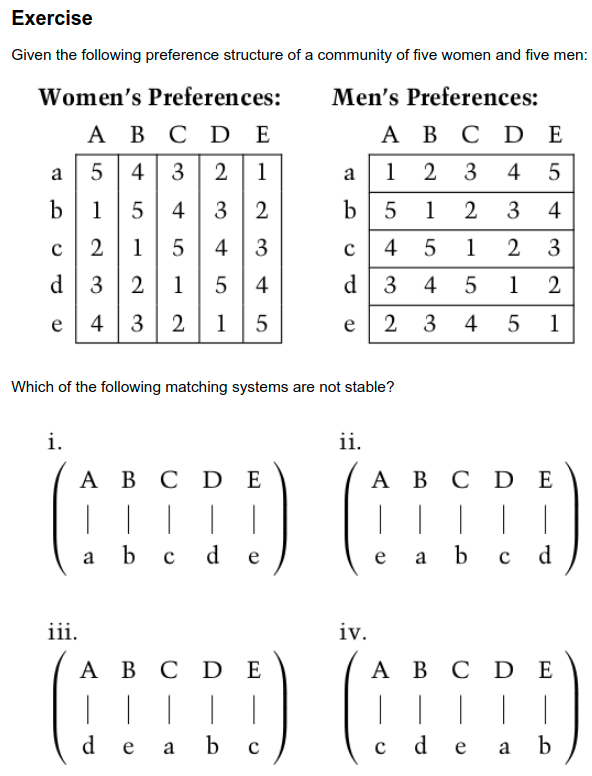

In [14]:
pref_0 = np.array([[5,4,3,2,1],[1,5,4,3,2],[2,1,5,4,3],[3,2,1,5,4],[4,3,2,1,5]]).T
pref_1 = np.array([[1,2,3,4,5],[5,1,2,3,4],[4,5,1,2,3],[3,4,5,1,2],[2,3,4,5,1]])

pref = [pref_0, pref_1]

names_0 = np.array(["A","B","C","D","E"])
names_1 = np.array(["a","b","c","d","e"])

names = [names_0, names_1]

In [15]:
prop1 = [["A","a"],["B","b"],["C","c"],["D","d"],["E","e"]]
prop1_input = (prop1,pref,names)
check_stability(prop1_input)

    A        B        C        D        E    
    |        |        |        |        |    
    a        b        c        d        e    
   5x1      5x1      5x1      5x1      5x1   

* A is currently matched with a - their 5. choice
  Let's see if they can persuade a higher preferred candidate.
   - Their 1. choice is b:
      b is currently matched with B, their 1. choice.
      Since A is b's 5. choice and 5>1
         --> b is satisfied with their current match.

   - Their 2. choice is c:
      c is currently matched with C, their 1. choice.
      Since A is c's 4. choice and 4>1
         --> c is satisfied with their current match.

   - Their 3. choice is d:
      d is currently matched with D, their 1. choice.
      Since A is d's 3. choice and 3>1
         --> d is satisfied with their current match.

   - Their 4. choice is e:
      e is currently matched with E, their 1. choice.
      Since A is e's 2. choice and 2>1
         --> e is satisfied with their current match.

--

In [16]:
prop2 = [["A","e"],["B","a"],["C","b"],["D","c"],["E","d"]]
prop2_input = (prop2,pref,names)
check_stability(prop2_input,verbose=False)

    A        B        C        D        E    
    |        |        |        |        |    
    e        a        b        c        d    
   4x2      4x2      4x2      4x2      4x2   


This proposal is stable.


In [17]:
prop3 = [["A","d"],["B","e"],["C","a"],["D","b"],["E","c"]]
prop3_input = (prop3,pref,names)
check_stability(prop3_input,verbose=False)

    A        B        C        D        E    
    |        |        |        |        |    
    d        e        a        b        c    
   3x3      3x3      3x3      3x3      3x3   


This proposal is stable.


In [18]:
prop4 = [["A","c"],["B","d"],["C","e"],["D","a"],["E","b"]]
prop4_input = (prop4,pref,names)
check_stability(prop4_input,verbose=False)

    A        B        C        D        E    
    |        |        |        |        |    
    c        d        e        a        b    
   2x4      2x4      2x4      2x4      2x4   


This proposal is stable.


# Reference:
Ein-Ya Gura & Michael B. Maschler, ["Insights Into Game Theory"](http://katalog.hacettepe.edu.tr/client/tr_TR/default_tr/search/detailnonmodal/ent:$002f$002fSD_ILS$002f0$002fSD_ILS:312448/one?qu=ein+ya+gura), Cambridge Uni. Press, 2008. [ISBN 978-0-511-45538-4](https://www.google.com/search?q=ISBN+978-0-511-45538-4&oq=ISBN+978-0-511-45538-4)